In [13]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

from constants.visualization_defaults import FIG_SIZE, FONT_SIZE_PARAMS

plt.rcParams.update(FONT_SIZE_PARAMS) 

In [14]:
lookup = {
    'clean_f1': 'Original (clean)',
    'corrupted_f1': 'Corrupted',
    'cleaned_conf_learn_f1': 'Cleaned Confident Learning',
    'cleaned_binary_conf_learn_f1': 'Cleaned Binary Confident Learning Adjustment',
    'cleaned_cvcf_f1': 'Cleaned CVCF',
    'cleaned_fkdn_f1': 'Cleaned FKDN',
    'cleaned_harf_f1': 'Cleaned HARF'
}

color_lookup = {
        'Original (clean)': '#9467bd',      
        'Corrupted': '#a9a9a9',             
        'Cleaned Confident Learning': '#1f77b4', 
        'Cleaned Binary Confident Learning Adjustment': '#17becf',
        'Cleaned FKDN': '#ff7f0e',                 
        'Cleaned CVCF': '#2ca02c',                 
        'Cleaned HARF': '#cb4848'                  
    }


figsize = FIG_SIZE
plt.rcParams.update({'font.size': 18}) 

In [15]:
def get_downstream_classifier_evaluation_data(general_dataset, specific_dataset):
    with open(f'../../results/evaluation_{general_dataset}/experiment_down_stream_classifier.json', 'r') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    columns = [col for col in df.columns if 'f1' in col]
    df = df[[*columns, 'dataset']]

    order = ['rf', 'tree', 'svm']
    df['sort_key'] = df['dataset'].str.extract(rf'{specific_dataset}_(\w+)')
    df['sort_key'] = pd.Categorical(df['sort_key'], categories=order, ordered=True)
    df = df.sort_values('sort_key').drop(columns='sort_key')

    return df, columns

In [16]:
def plot_downstream_data(df, data_columns, datasets = ["RF", "Tree", "LSVC"], with_binary_conf_learn_adjustment = False):
    df_melted = df.melt(id_vars="dataset", value_vars=data_columns,
                    var_name="method", value_name="f1_performance")
    
    df_melted['method'] = df_melted['method'].replace(lookup)
    methods = ['Original (clean)', 'Corrupted', 'Cleaned Confident Learning', 'Cleaned Binary Confident Learning Adjustment', 'Cleaned FKDN',
        'Cleaned CVCF', 'Cleaned HARF'] if with_binary_conf_learn_adjustment else ['Original (clean)', 'Corrupted', 'Cleaned Confident Learning', 'Cleaned FKDN',
        'Cleaned CVCF', 'Cleaned HARF']
    
    x = np.arange(len(datasets))
    bar_width = 0.13
    offsets = np.linspace(-bar_width * (len(methods) - 1) / 2, 
                        bar_width * (len(methods) - 1) / 2, 
                        len(methods))

    plt.figure(figsize=figsize)

    for i, method in enumerate(methods):
        method_data = df_melted[df_melted["method"] == method]
        plt.bar(x + offsets[i], method_data["f1_performance"], width=bar_width, label=method, color=color_lookup.get(method, 'gray'))

    plt.ylabel("F1 score")
    plt.xlabel("Teacher Model")
    plt.xticks(ticks=x, labels=datasets)
    plt.ylim(0.5, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()

# Music

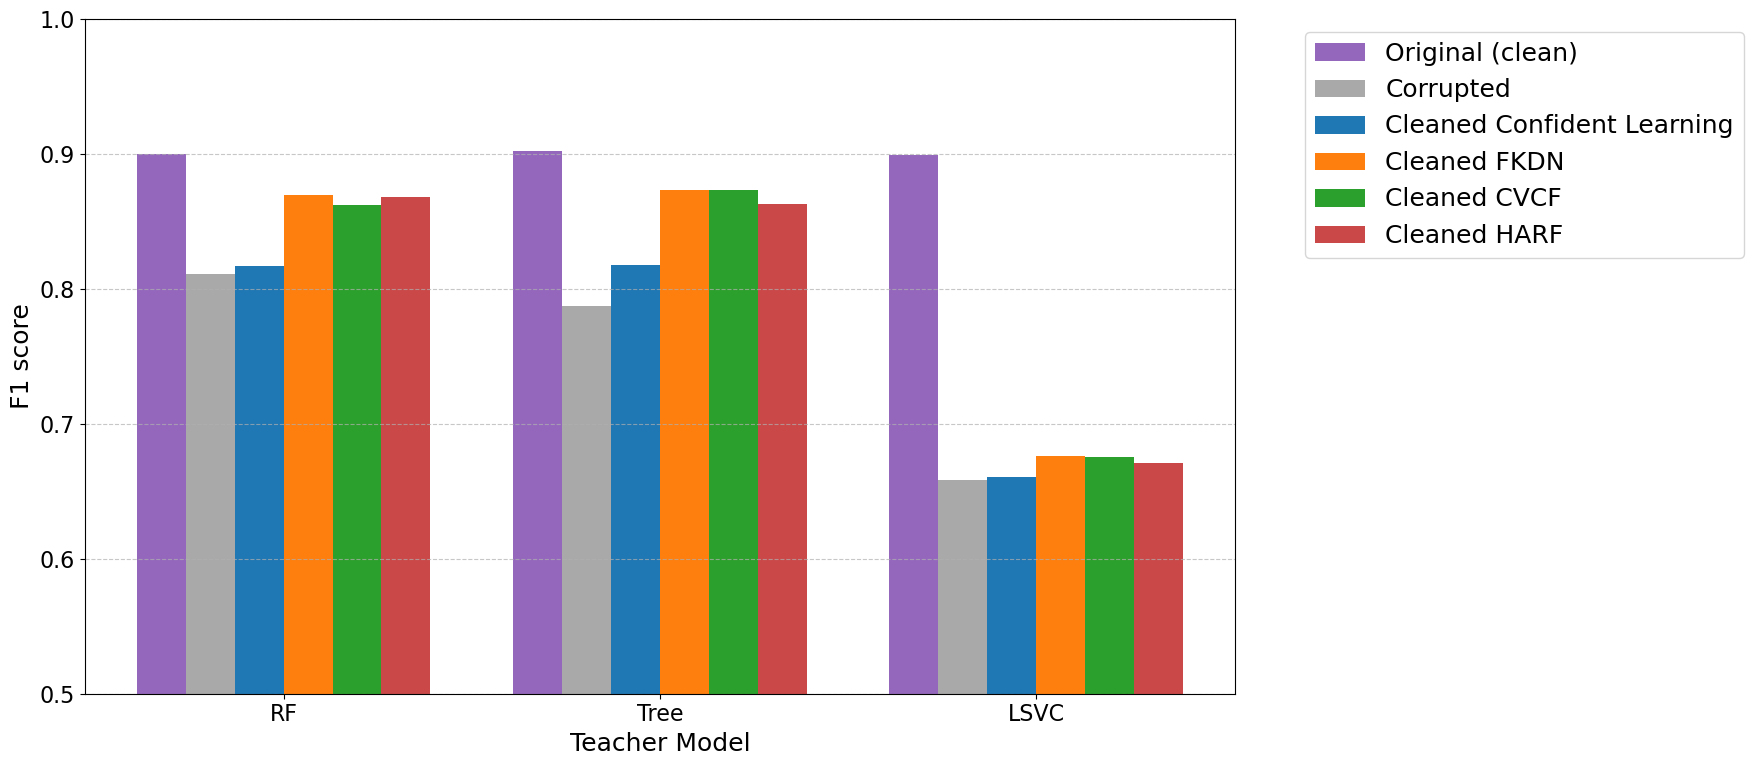

In [17]:
df, columns = get_downstream_classifier_evaluation_data('music', 'music_most_values')

plot_downstream_data(df, columns)

# WDC-almser

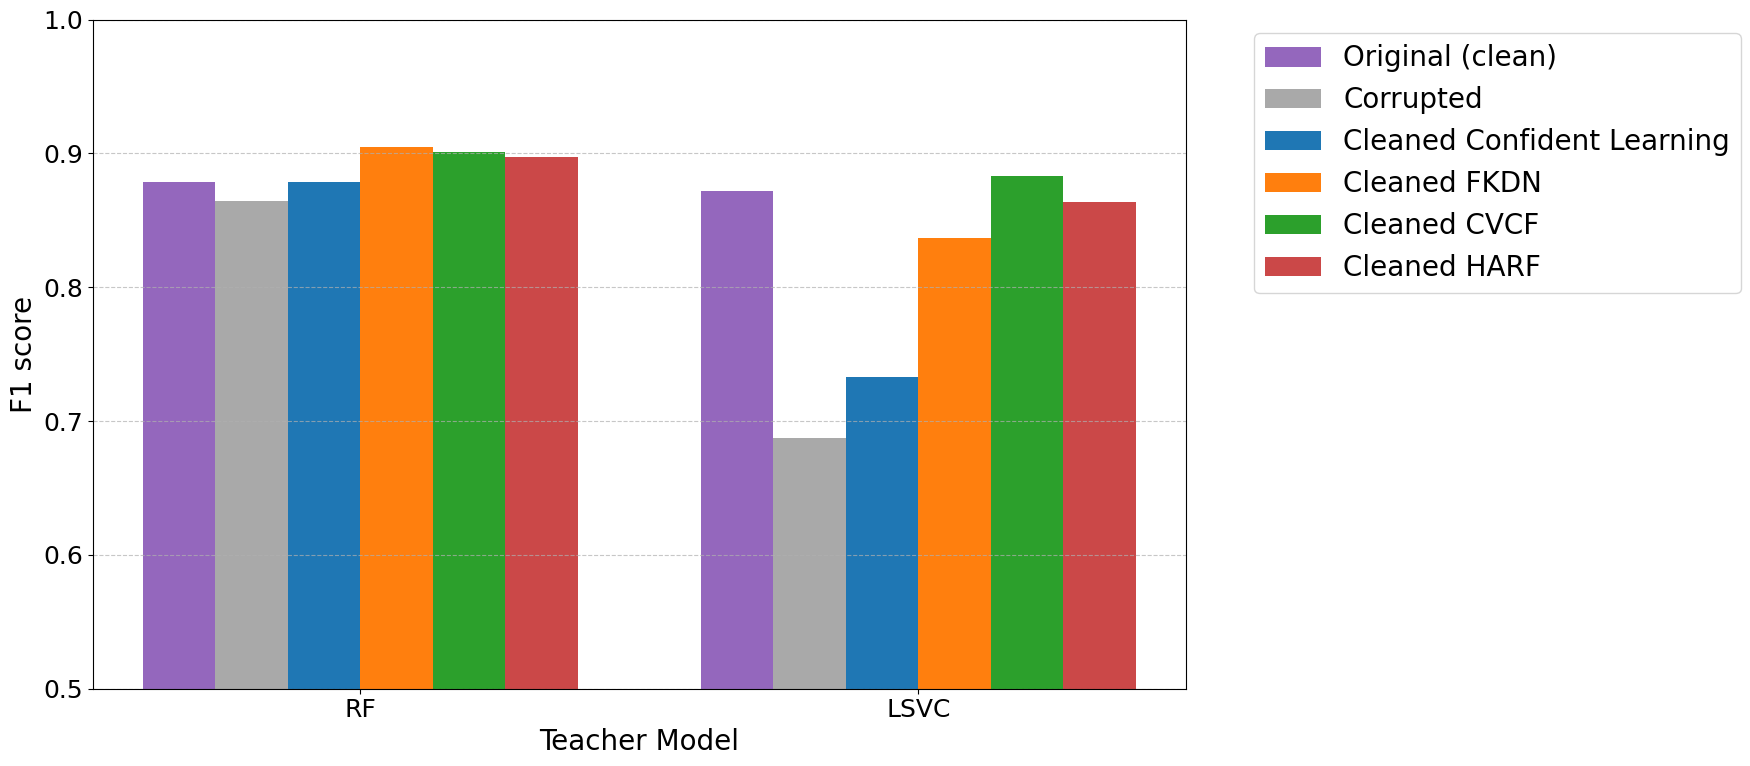

In [18]:
plt.rcParams.update({
    'axes.titlesize': 22,   
    'axes.labelsize': 20,   
    'xtick.labelsize': 18,  
    'ytick.labelsize': 18,  
    'legend.fontsize': 20   
}) 

df, columns = get_downstream_classifier_evaluation_data('wdc_almser', 'wdc_almser_most_values')

df = df[df["dataset"] != "wdc_almser_most_values_tree"]

plot_downstream_data(df, columns, datasets=["RF", "LSVC"])

# Dexter

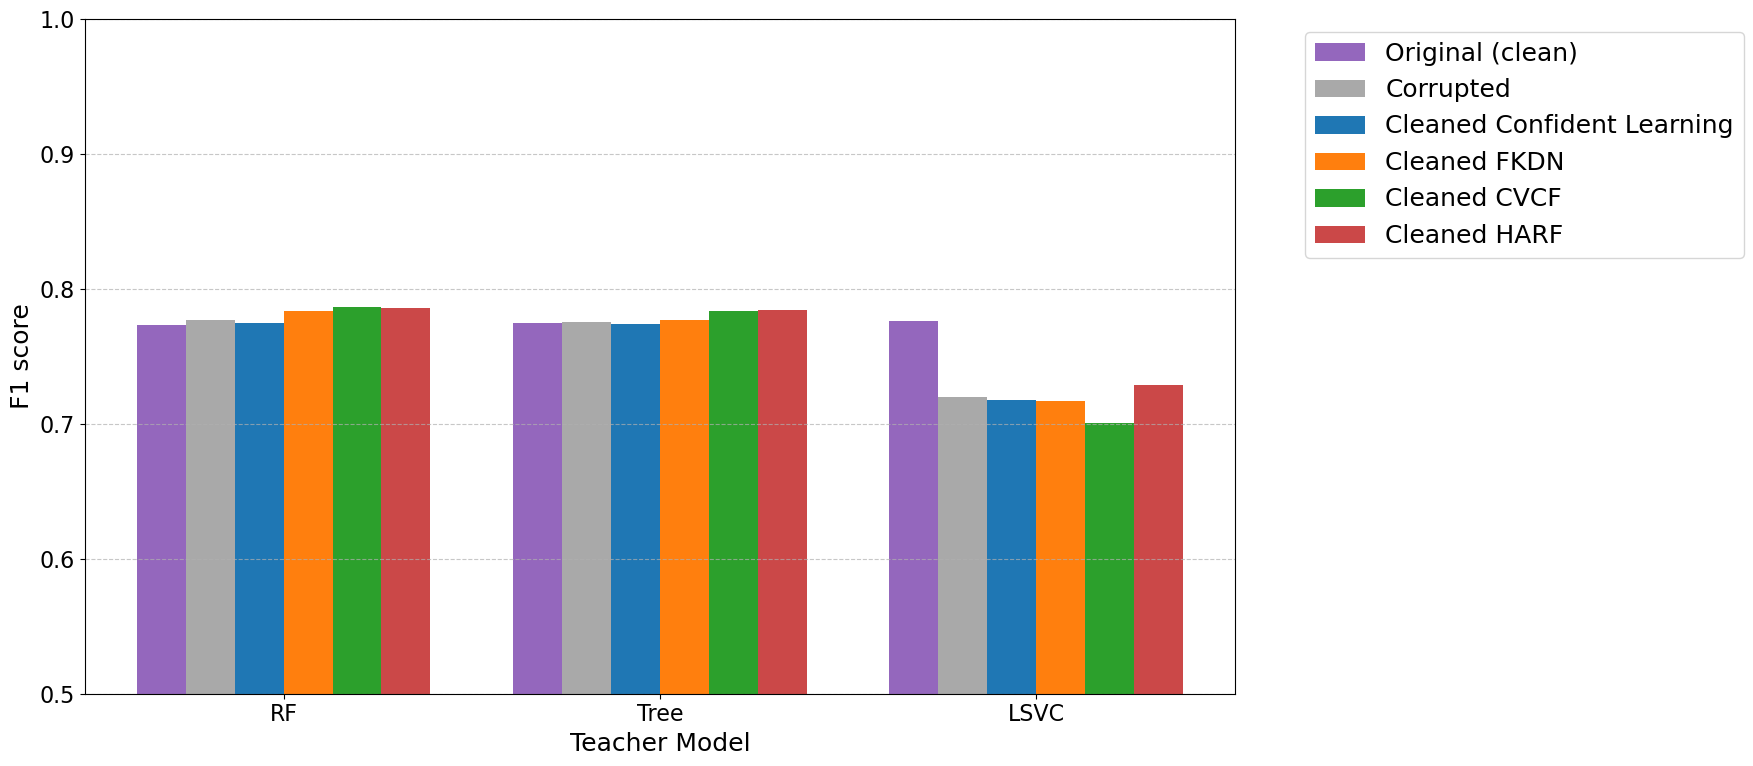

In [19]:
plt.rcParams.update(FONT_SIZE_PARAMS) 

df, columns = get_downstream_classifier_evaluation_data('dexter', 'dexter')

plot_downstream_data(df, columns)

# Binary Conf Learn Adjustment

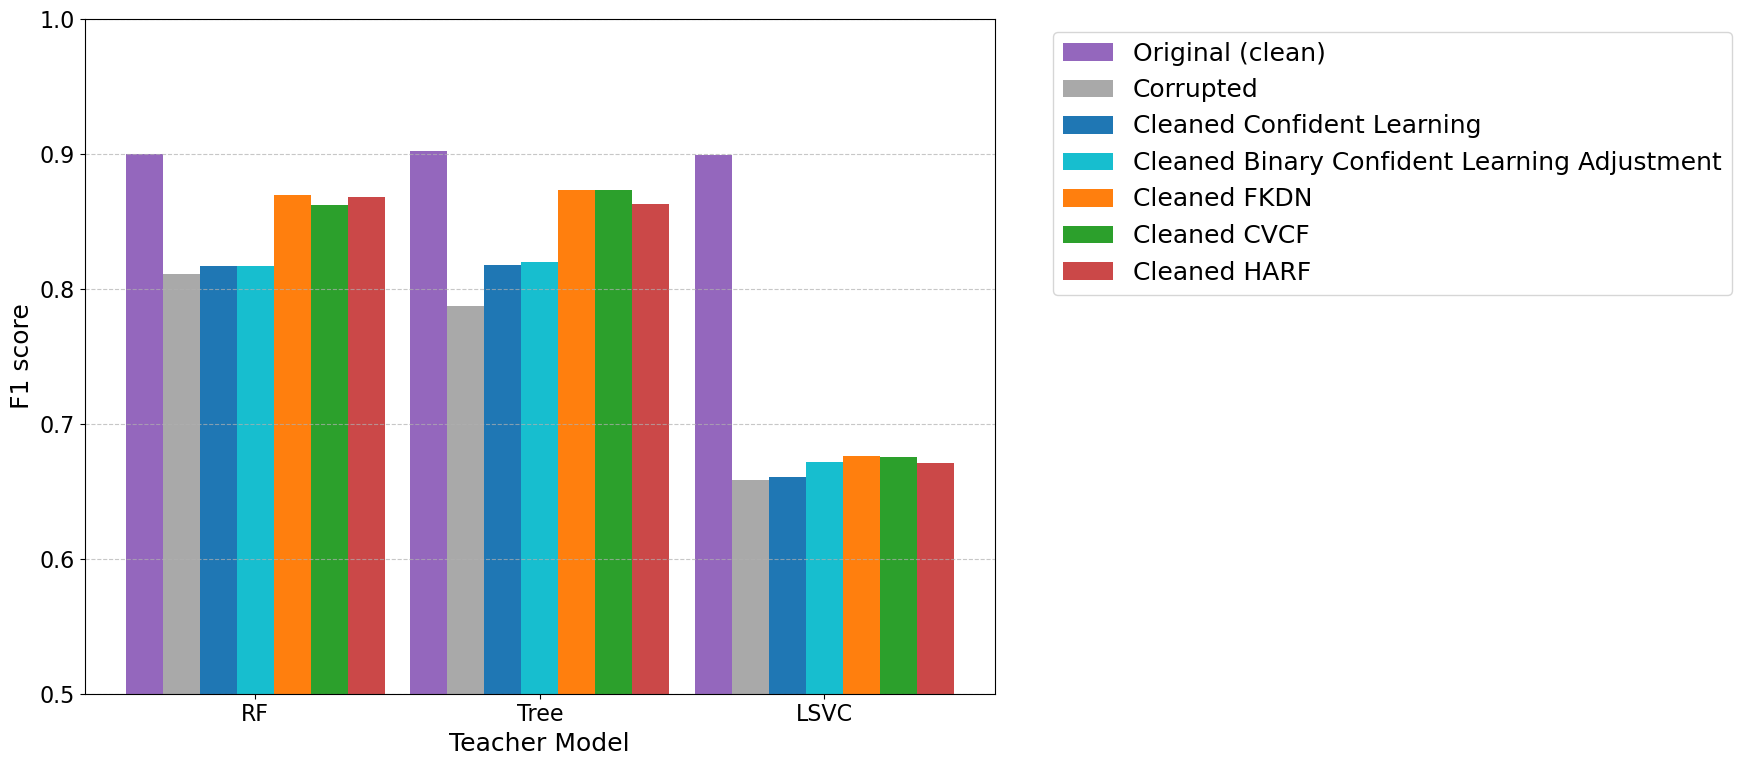

In [20]:
df, columns = get_downstream_classifier_evaluation_data('music', 'music_most_values')

plot_downstream_data(df, columns, with_binary_conf_learn_adjustment=True)